In [14]:
SELECT * FROM 'ch5_employment.csv';

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01 00:00:00+00:00,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01 00:00:00+00:00,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01 00:00:00+00:00,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01 00:00:00+00:00,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01 00:00:00+00:00,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01 00:00:00+00:00,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01 00:00:00+00:00,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01 00:00:00+00:00,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01 00:00:00+00:00,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [15]:
#Get some info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype              
---  ------                          --------------  -----              
 0   datestamp                       122 non-null    datetime64[us, UTC]
 1   Agriculture                     122 non-null    float64            
 2   Business services               122 non-null    float64            
 3   Construction                    122 non-null    float64            
 4   Durable goods manufacturing     122 non-null    float64            
 5   Education and Health            122 non-null    float64            
 6   Finance                         122 non-null    float64            
 7   Government                      122 non-null    float64            
 8   Information                     122 non-null    float64            
 9   Leisure and hospitality         122 non-null    float64            
 10  Manufacturing 

In [16]:
#display the head of the dataframe
df.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01 00:00:00+00:00,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01 00:00:00+00:00,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01 00:00:00+00:00,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01 00:00:00+00:00,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01 00:00:00+00:00,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [17]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Check if 'datestamp' column exists in the DataFrame
if 'datestamp' in df.columns:
    df['datestamp'] = pd.to_datetime(df['datestamp'])
else:
    print("Column 'datestamp' does not exist in the DataFrame.")

In [19]:
df.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01 00:00:00+00:00,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01 00:00:00+00:00,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01 00:00:00+00:00,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01 00:00:00+00:00,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01 00:00:00+00:00,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


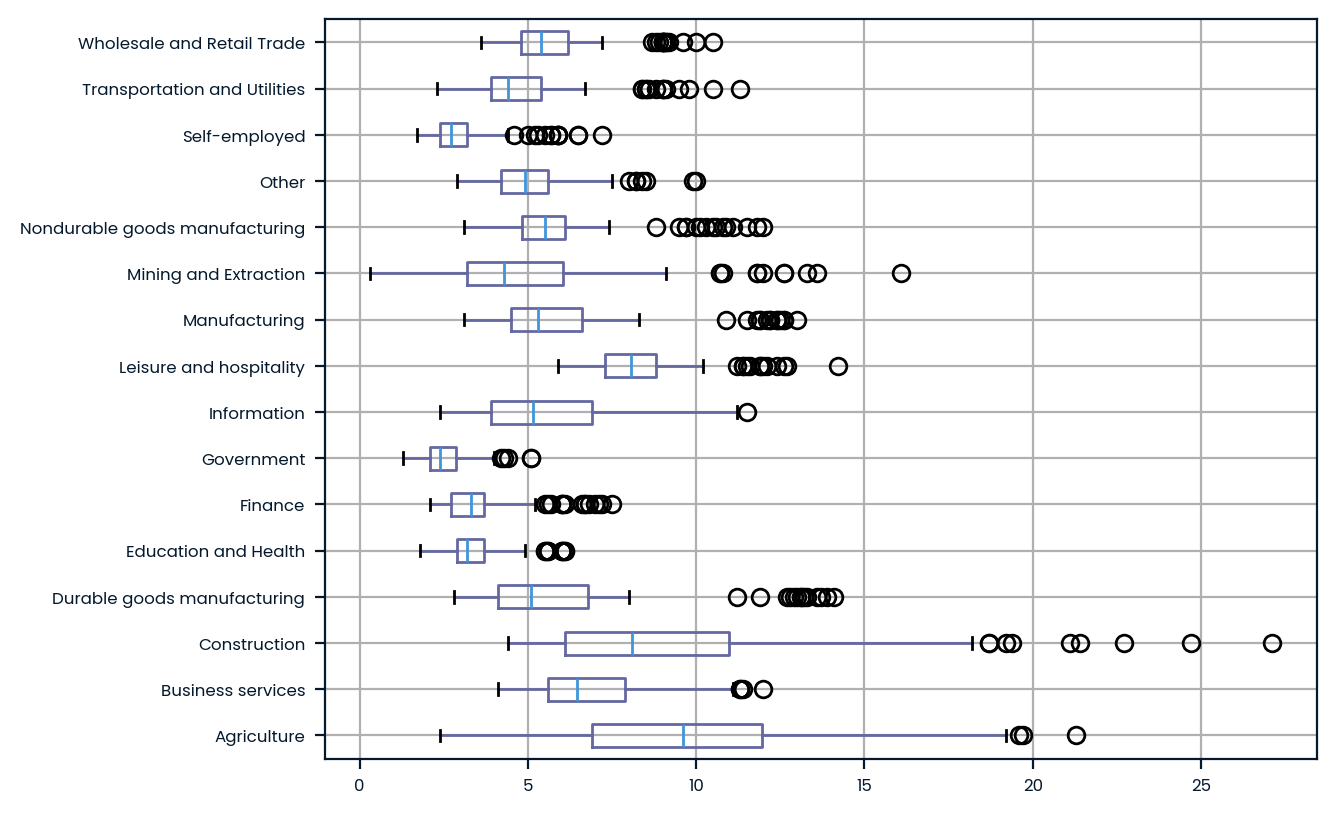

In [20]:
#plot for jobs and period of time
df.boxplot(fontsize=6, vert=False)
plt.show()

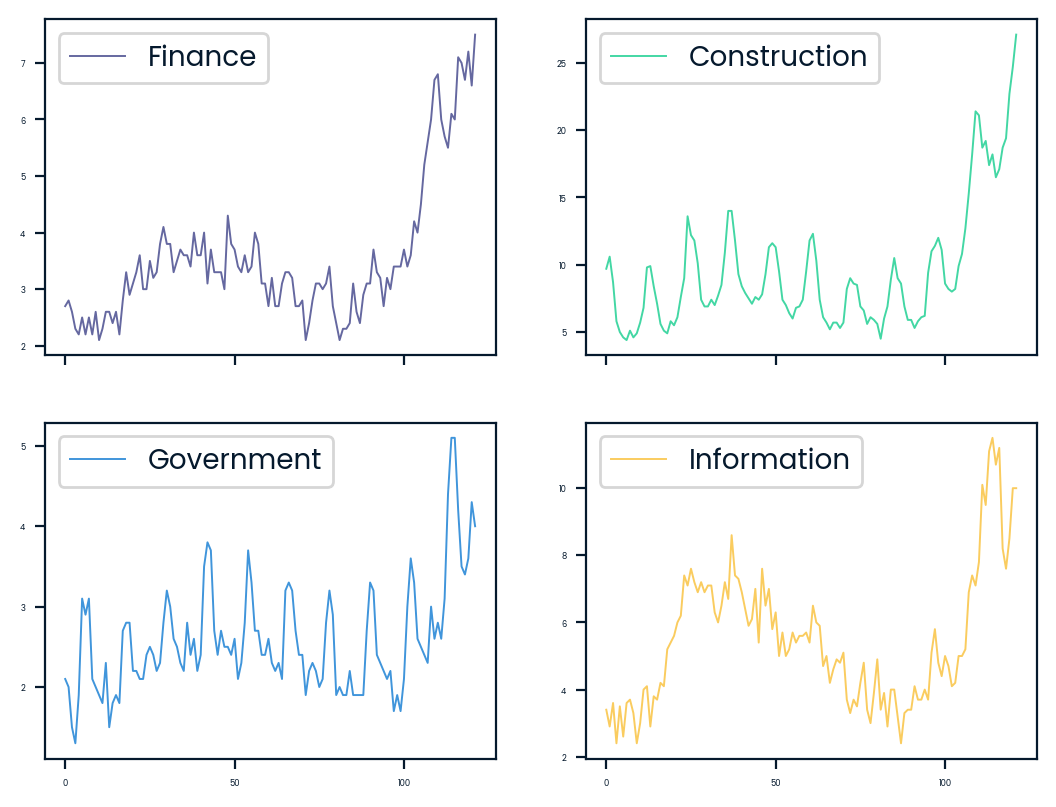

In [21]:
#sub-set the dataframe to select only few type of jobs and plot them
df_subset = df[['Finance', 'Construction', 'Government', 'Information']]

ax = df_subset.plot(subplots=True,
                      layout=(2,2),
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=True)

plt.show()

In [24]:
df_subset = df[['datestamp','Finance', 'Construction', 'Government', 'Information']]
df_limited = df_subset.set_index('datestamp')

In [25]:
#new dataframe 
df_limited.head()

,Finance,Construction,Government,Information
datestamp,,,,
2000-01-01 00:00:00+00:00,2.7,9.7,2.1,3.4
2000-02-01 00:00:00+00:00,2.8,10.6,2.0,2.9
2000-03-01 00:00:00+00:00,2.6,8.7,1.5,3.6
2000-04-01 00:00:00+00:00,2.3,5.8,1.3,2.4
2000-05-01 00:00:00+00:00,2.2,5.0,1.9,3.5


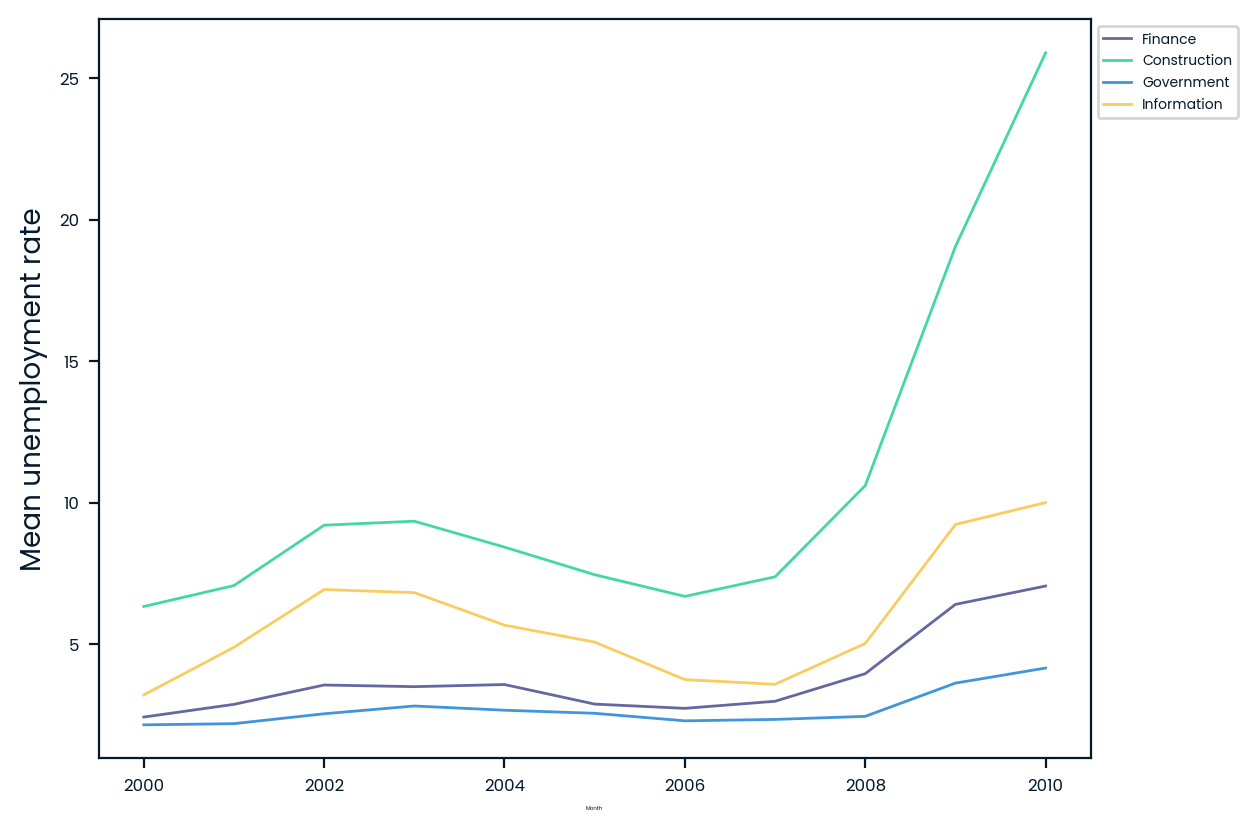

In [27]:
#view the jobs over a period of time, definite impact for construction and finance jobs during recession period
index_year = df_limited.index.year
df_by_year = df_limited.groupby(index_year).mean()
ax = df_by_year.plot(fontsize=6, linewidth=1)
ax.set_xlabel('Month', fontsize=2)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(1,1), fontsize=5)
plt.show()

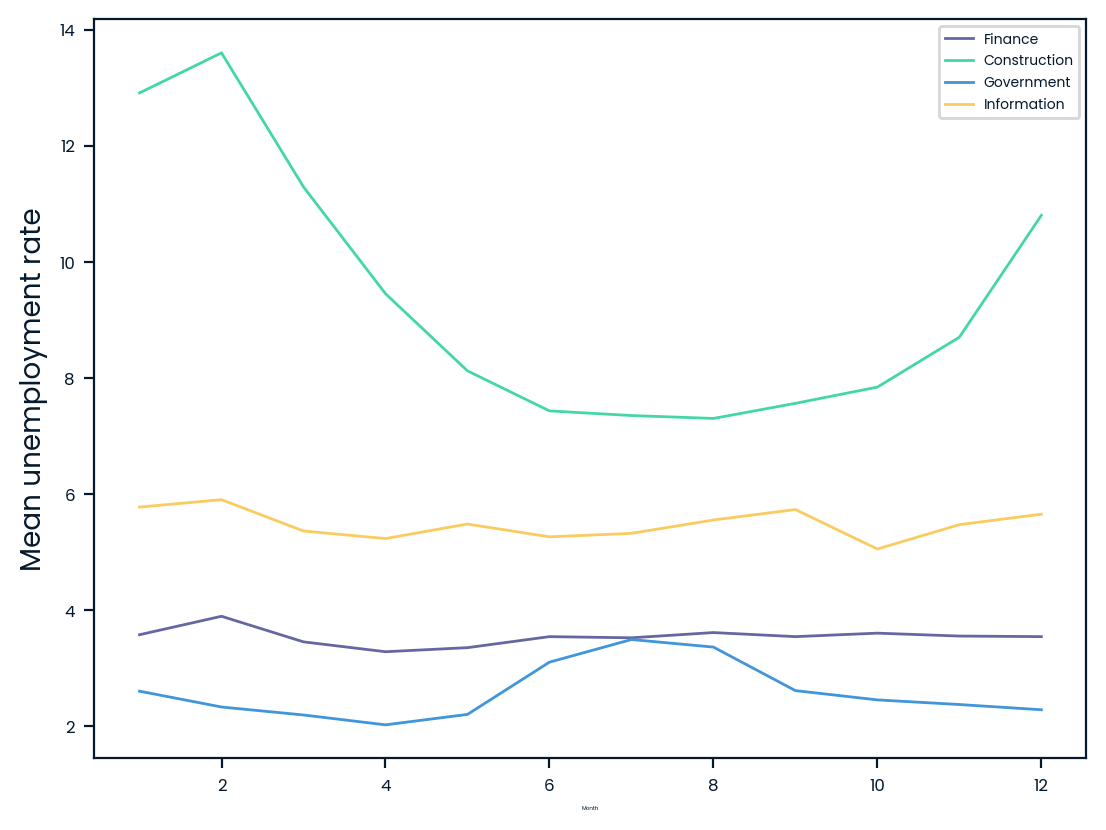

In [28]:
#view same thing month-wise
index_month = df_limited.index.month
df_by_month = df_limited.groupby(index_month).mean()
ax = df_by_month.plot(fontsize=6, linewidth=1)
ax.set_xlabel('Month', fontsize=2)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(1,1), fontsize=5)
plt.show()

In [33]:
# import libraries and let's decompose the time series
import statsmodels.api as sm
decompose = {}

# Get the names of each time series in the DataFrame
industry = df_limited.columns

# Run time series decomposition on each time series of the DataFrame
for ts in industry:
    ts_decompose = sm.tsa.seasonal_decompose(df_limited[ts])
    decompose[ts] = ts_decompose
    
print(decompose)

{'Finance': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f437efee6e0>, 'Construction': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f437f143e80>, 'Government': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f437f140a30>, 'Information': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f437f1436a0>}


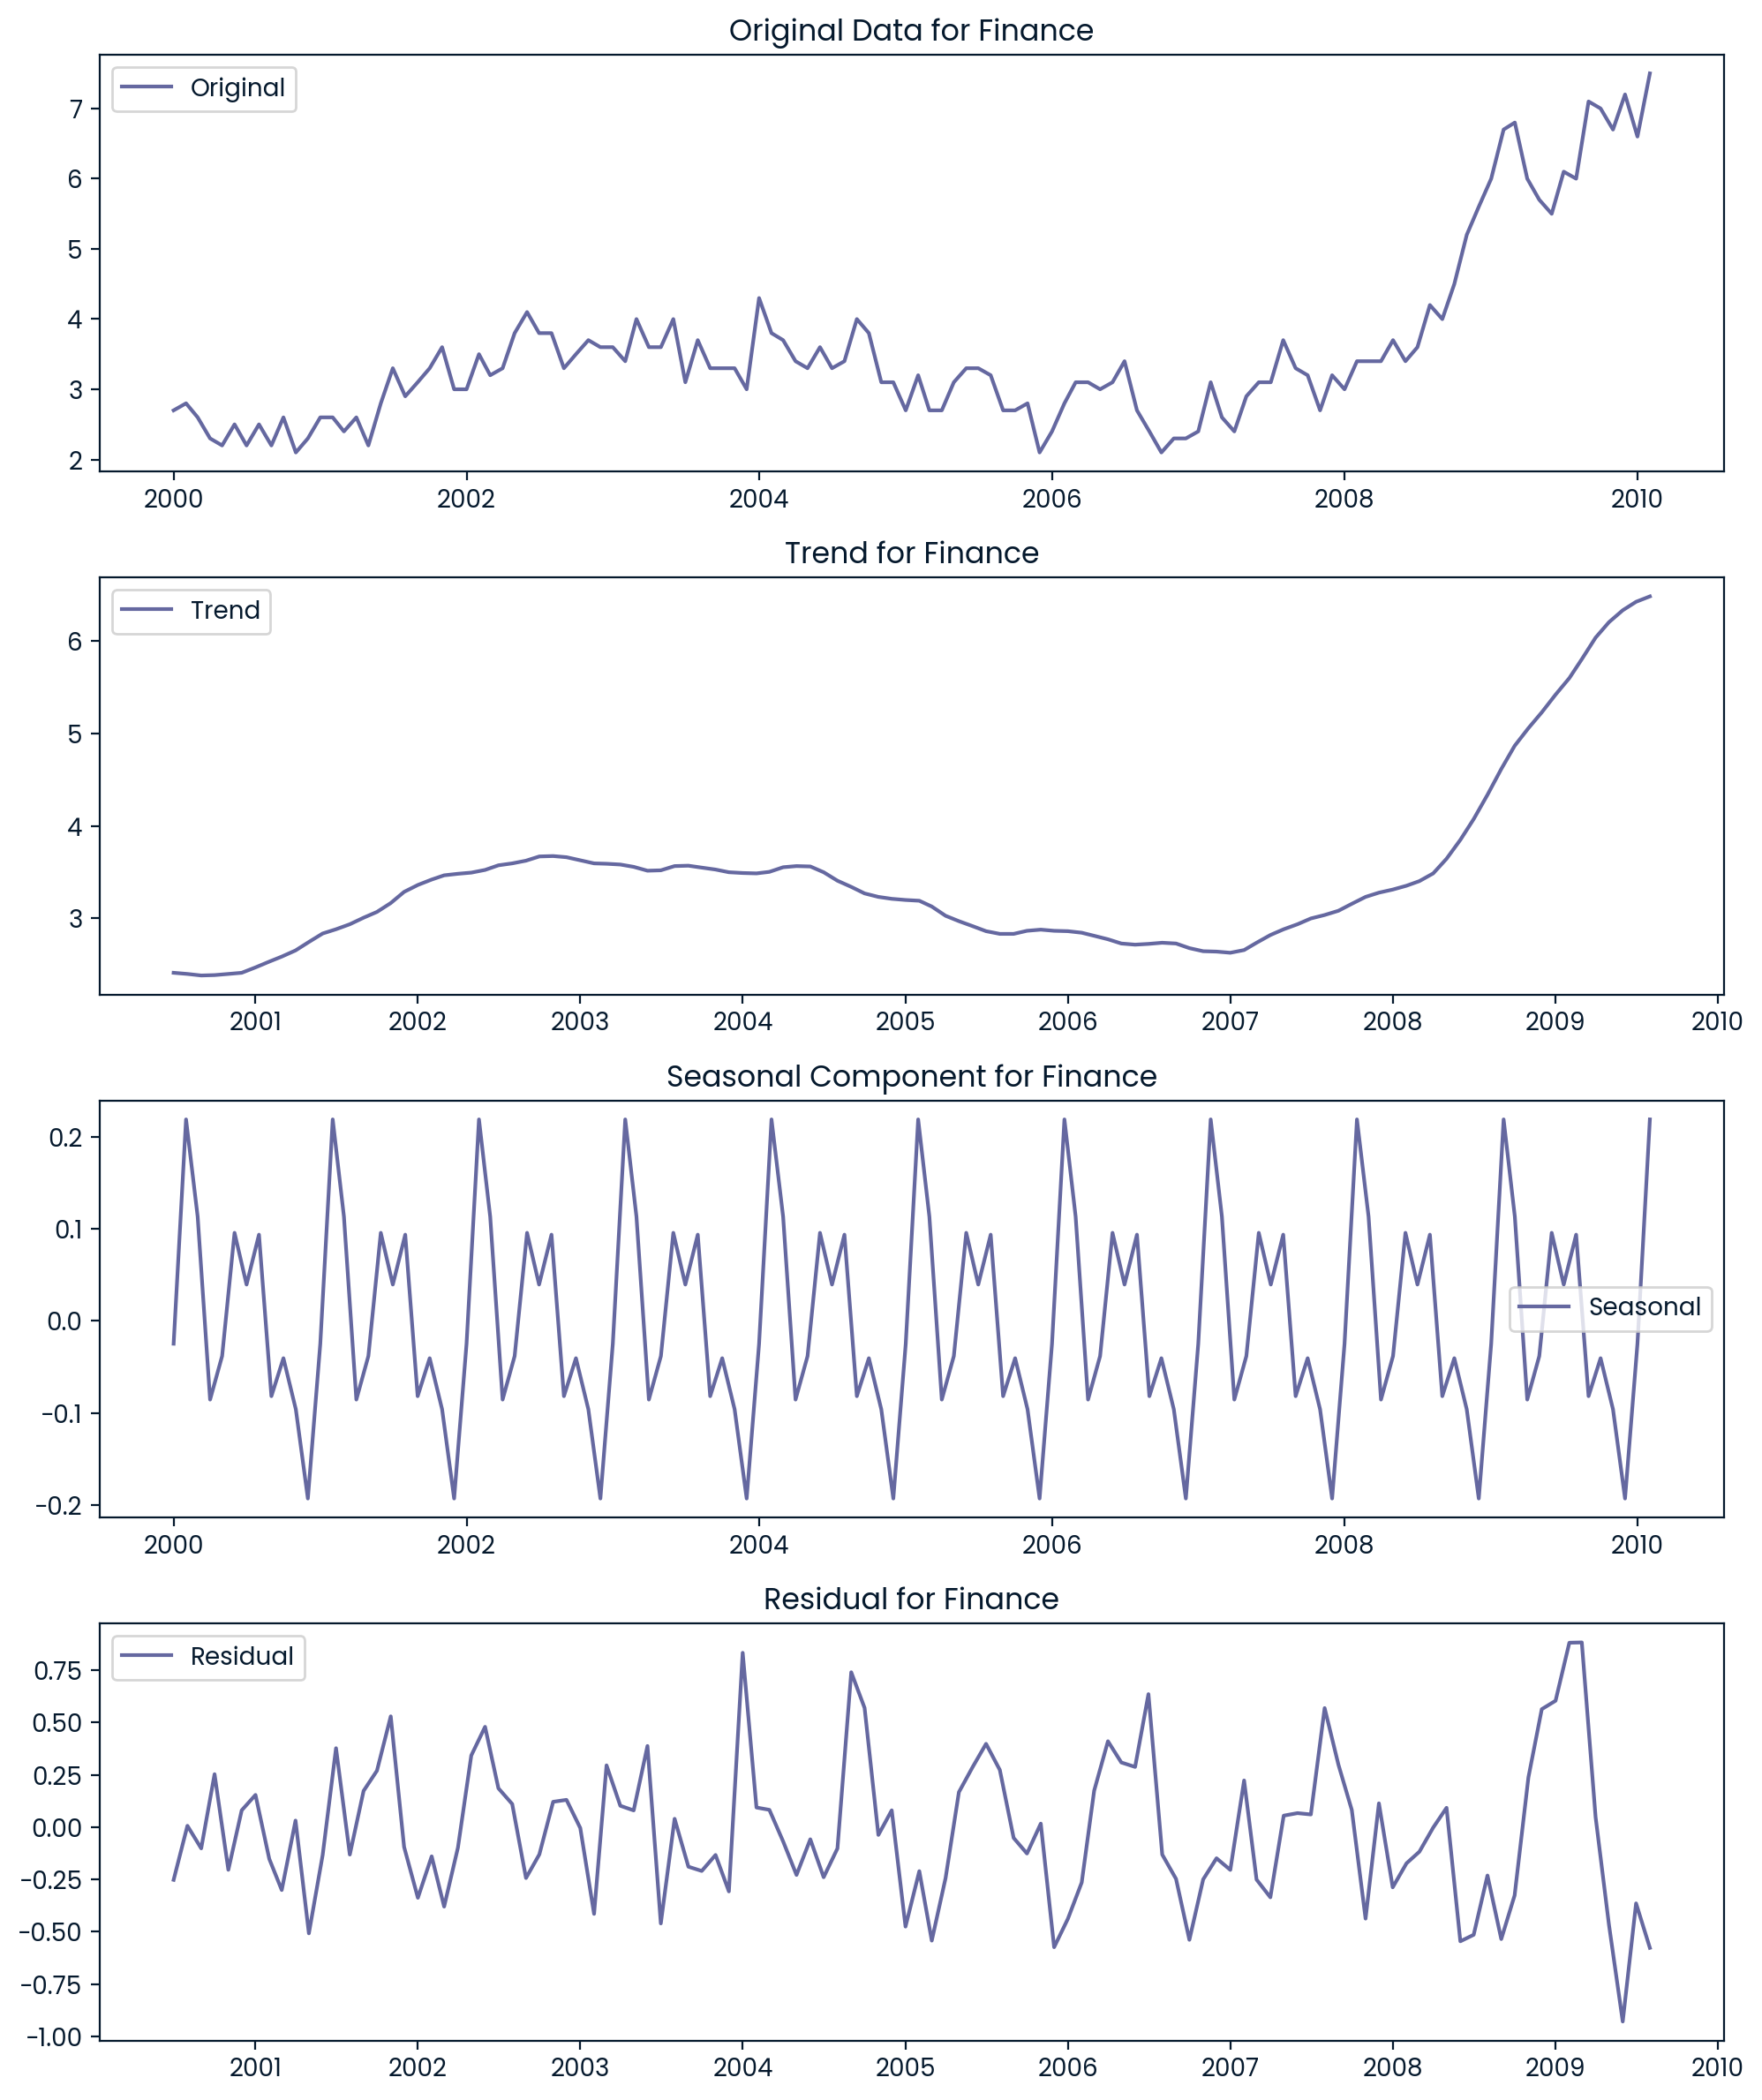

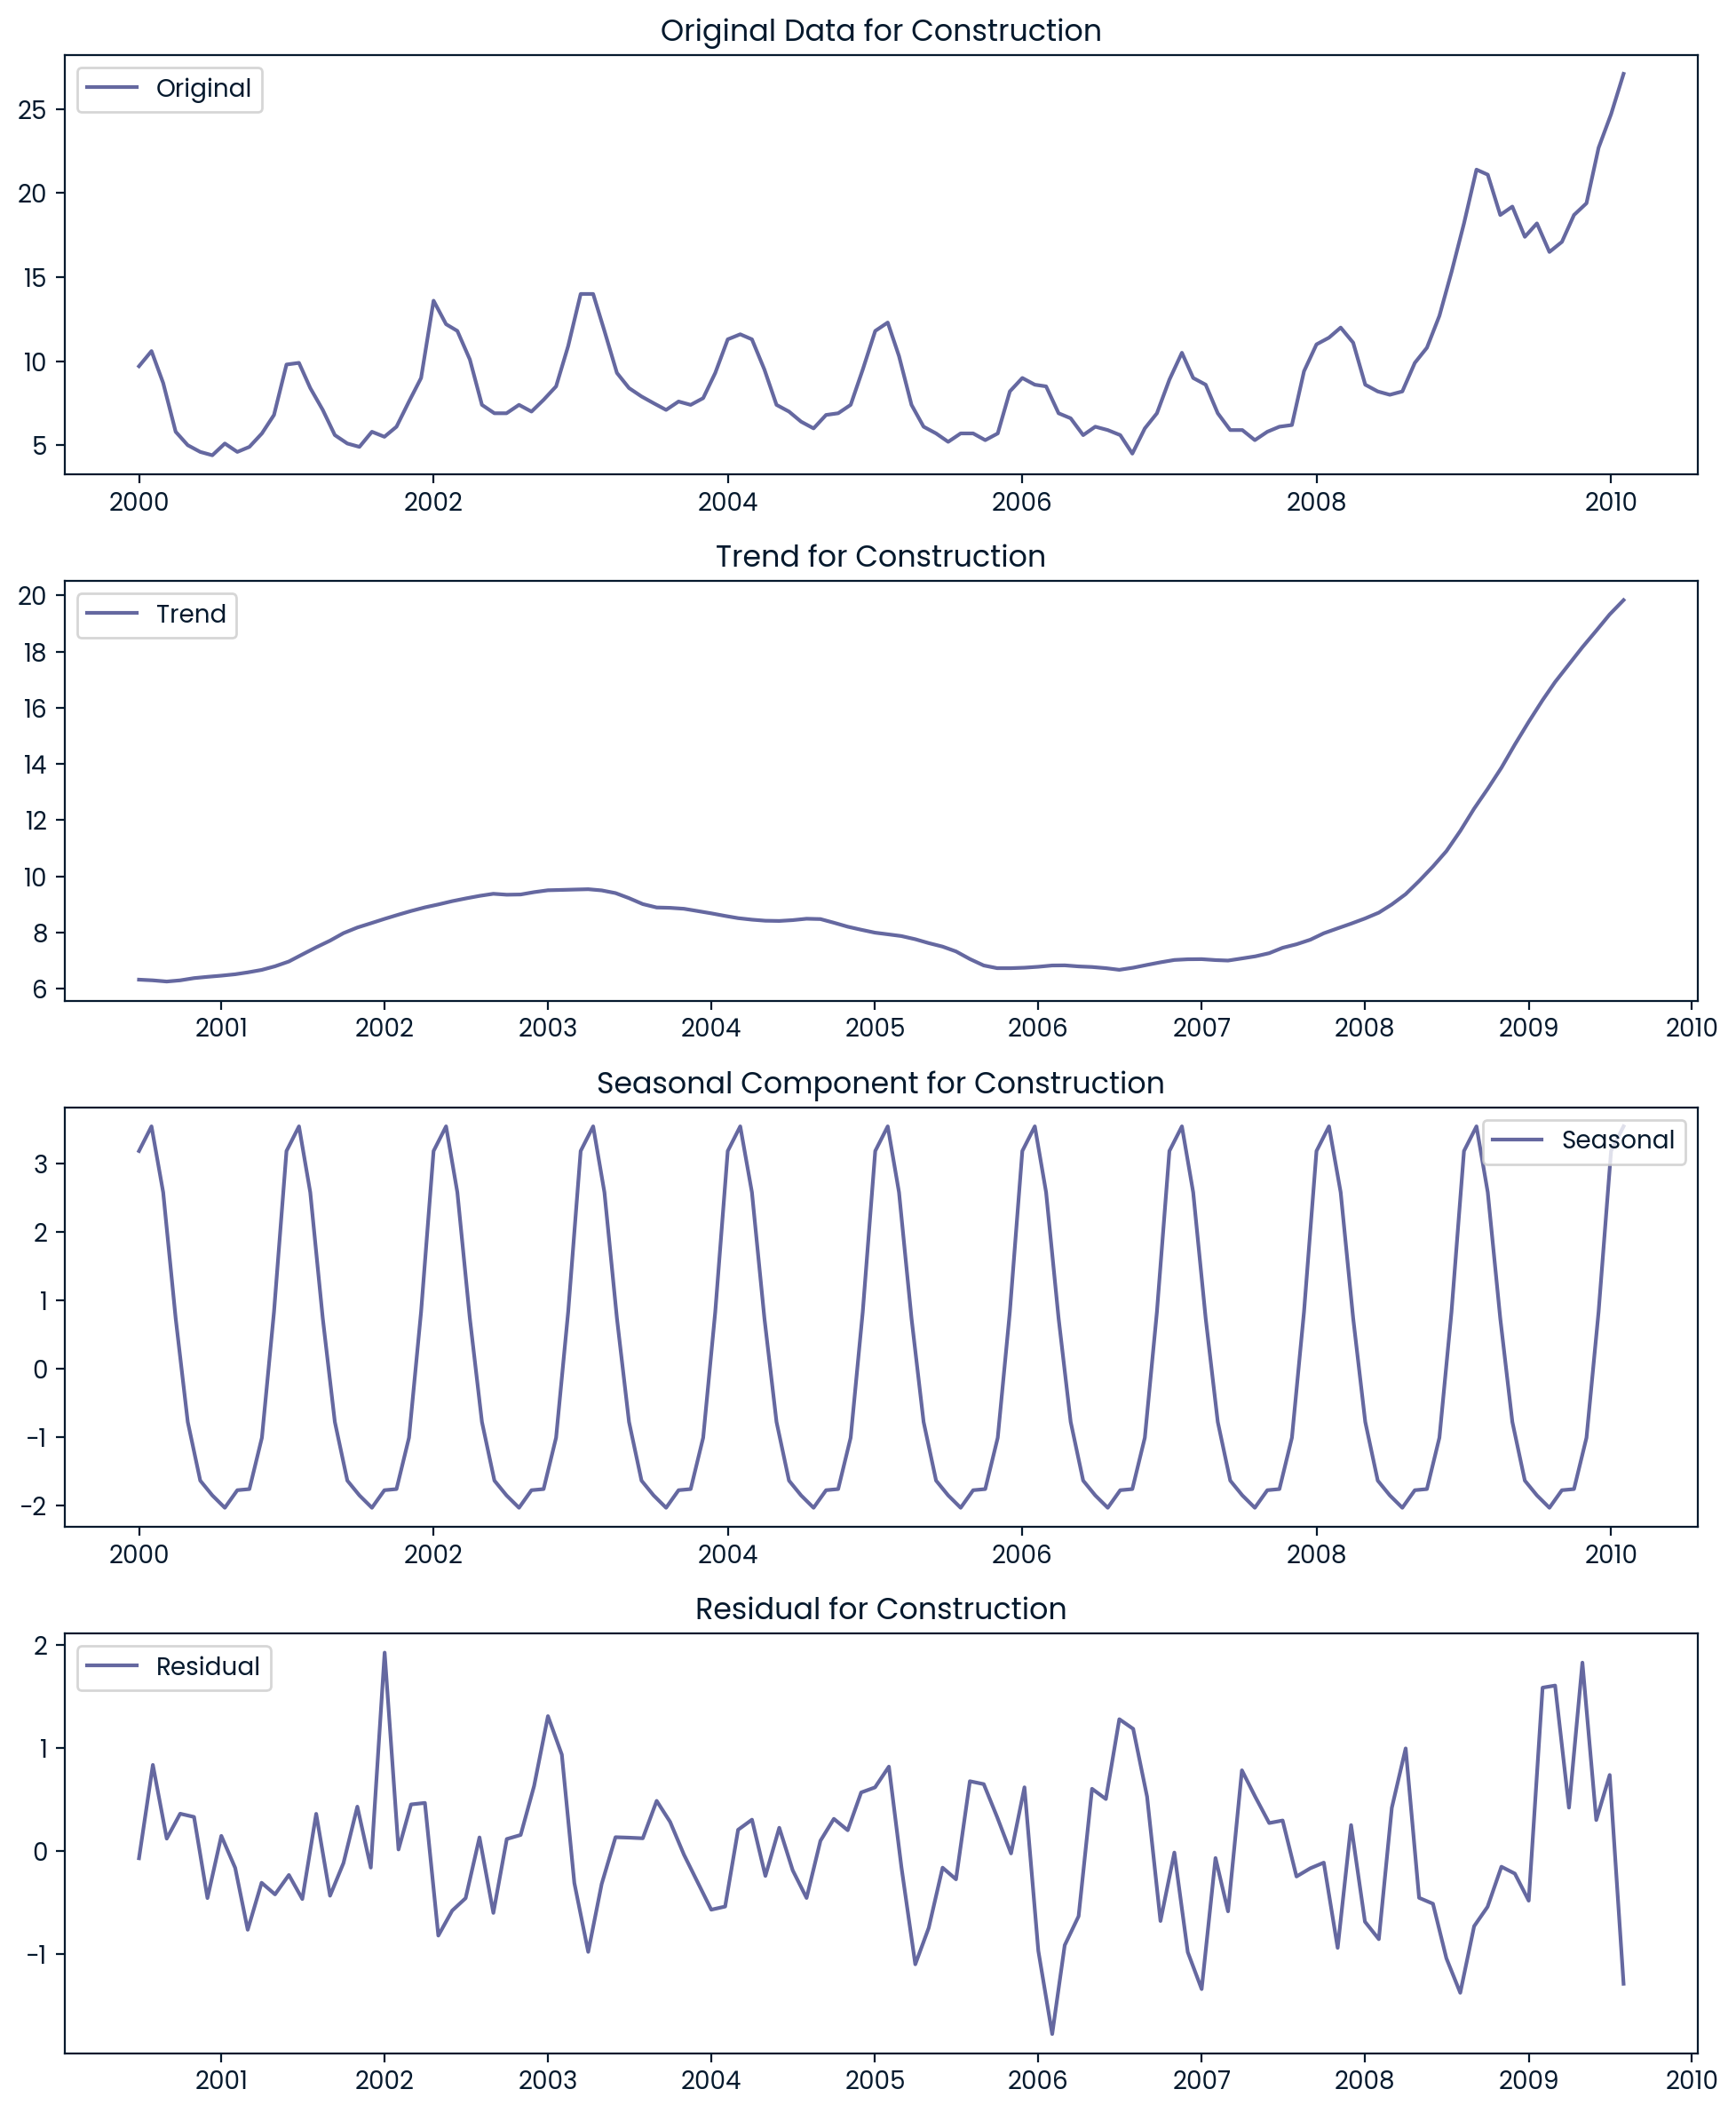

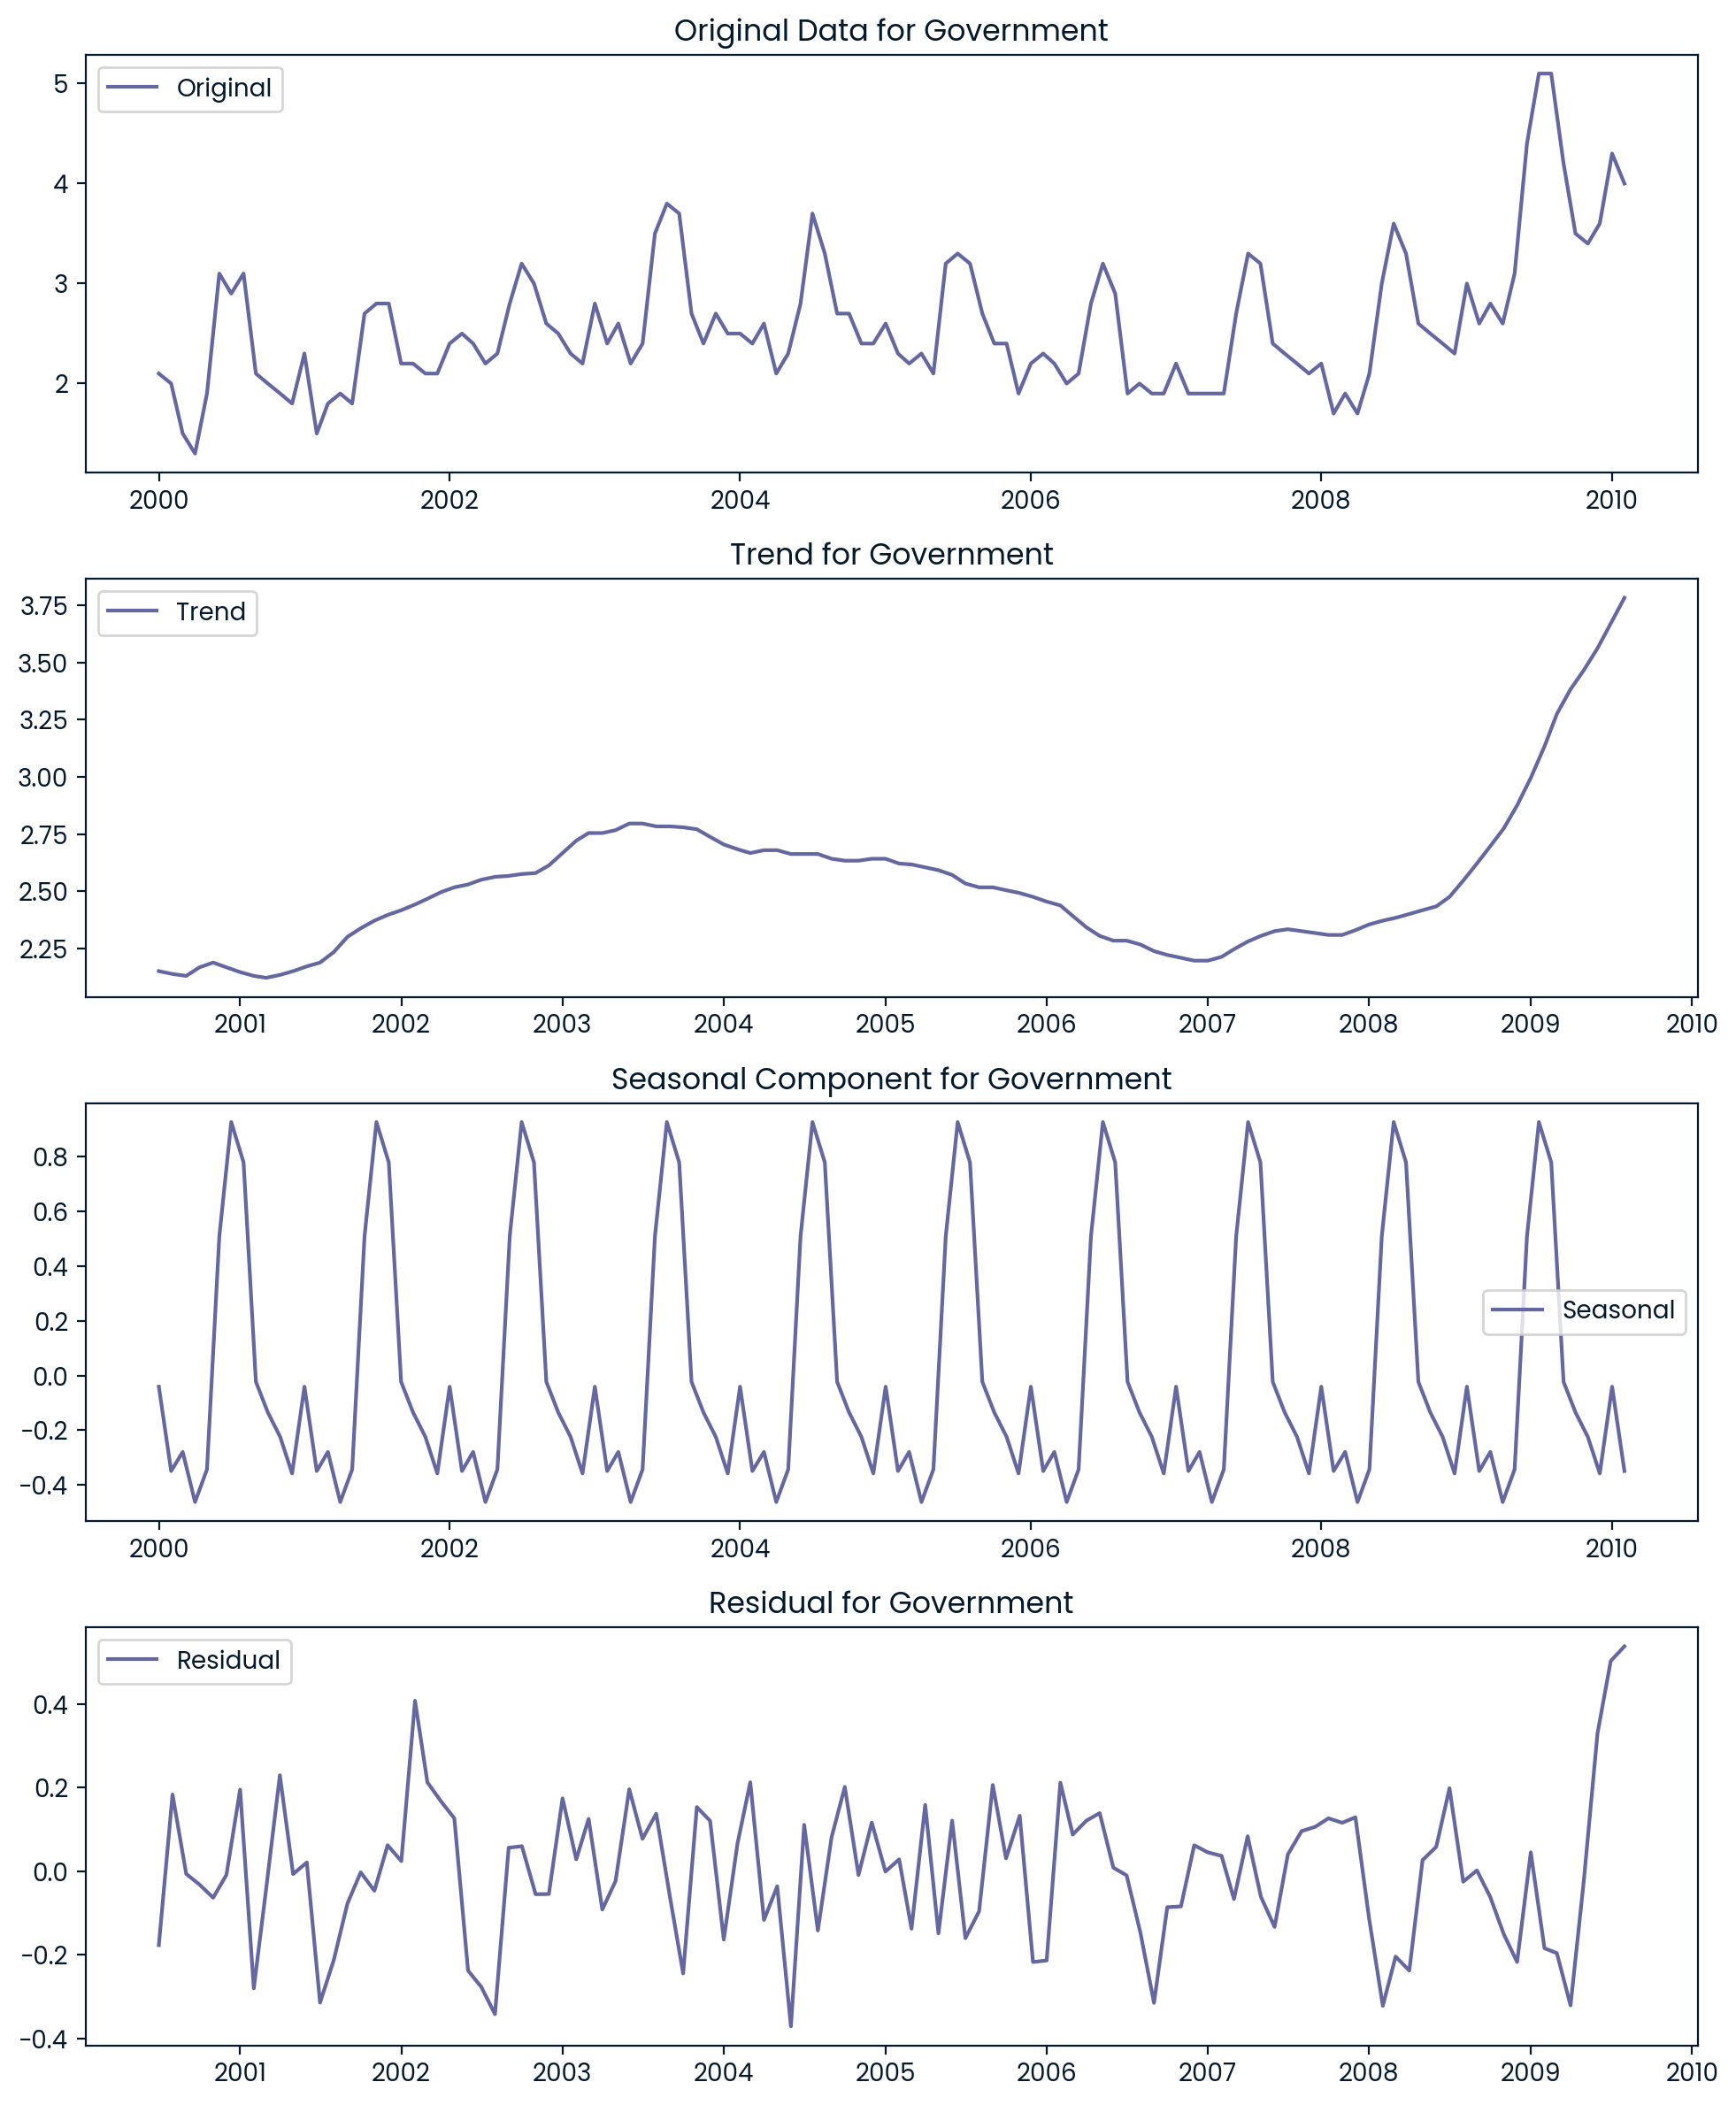

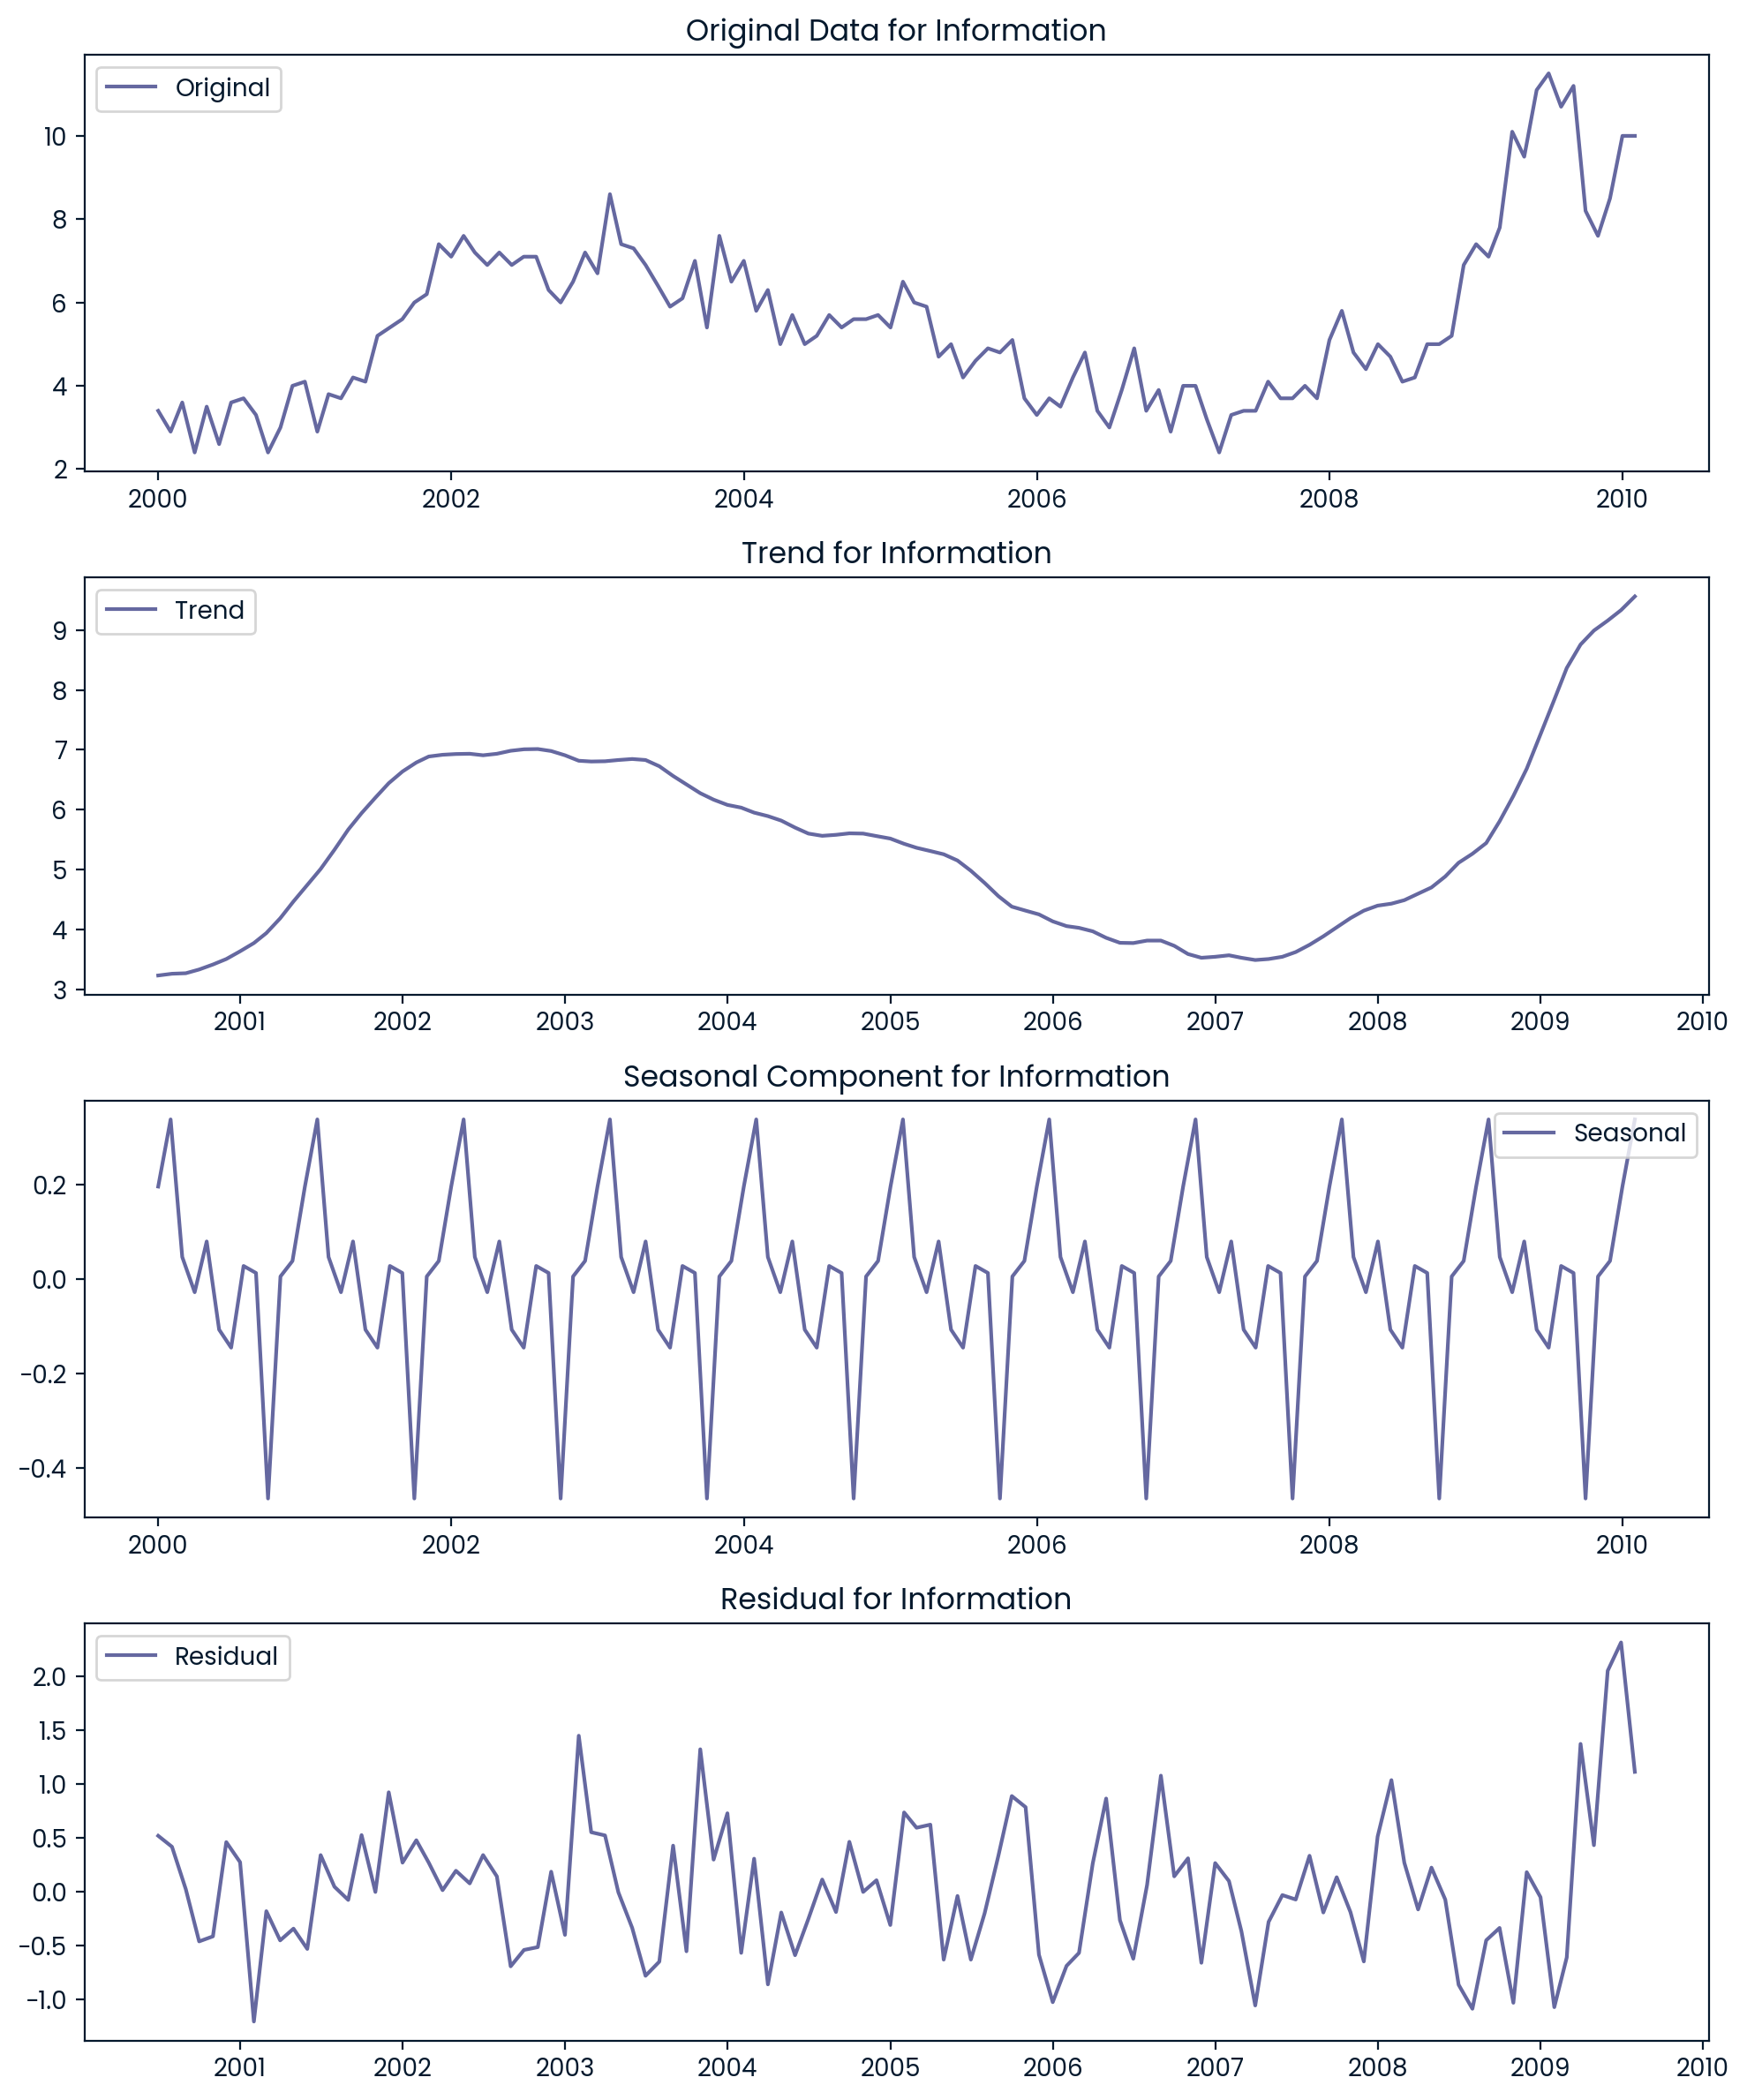

In [40]:
#For each job check the components of timeseries
for col, decomposition in decompose.items():
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
  # Create a figure with subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 12))

    # Plot original data
    axes[0].plot(df_limited[col], label='Original')
    axes[0].set_title(f'Original Data for {col}')
    axes[0].legend()

    # Plot trend
    axes[1].plot(trend, label='Trend')
    axes[1].set_title(f'Trend for {col}')
    axes[1].legend()

    # Plot seasonal
    axes[2].plot(seasonal, label='Seasonal')
    axes[2].set_title(f'Seasonal Component for {col}')
    axes[2].legend()

    # Plot residual
    axes[3].plot(residual, label='Residual')
    axes[3].set_title(f'Residual for {col}')
    axes[3].legend()

    plt.tight_layout()
    plt.show()

In [64]:
print(industry)

Index(['Finance', 'Construction', 'Government', 'Information'], dtype='object')


In [62]:
for ts in industry:
    seasonal_industry[ts] = decompose[ts].seasonal
print(seasonal_industry)


                           seasonal   Finance  ...  Government  Information
datestamp                                      ...                         
2000-01-01 00:00:00+00:00  0.195768 -0.024861  ...   -0.040779     0.195768
2000-02-01 00:00:00+00:00  0.337897  0.218657  ...   -0.349113     0.337897
2000-03-01 00:00:00+00:00  0.046694  0.113102  ...   -0.279205     0.046694
2000-04-01 00:00:00+00:00 -0.027843 -0.085509  ...   -0.462539    -0.027843
2000-05-01 00:00:00+00:00  0.079564 -0.038287  ...   -0.343094     0.079564
...                             ...       ...  ...         ...          ...
2009-10-01 00:00:00+00:00 -0.464417 -0.040602  ...   -0.134761    -0.464417
2009-11-01 00:00:00+00:00  0.005490 -0.096157  ...   -0.224113     0.005490
2009-12-01 00:00:00+00:00  0.038360 -0.192917  ...   -0.357909     0.038360
2010-01-01 00:00:00+00:00  0.195768 -0.024861  ...   -0.040779     0.195768
2010-02-01 00:00:00+00:00  0.337897  0.218657  ...   -0.349113     0.337897

[122 rows x

In [65]:
seasonal_industry = {}
for ts in industry:
    seasonal_industry[ts] = decompose[ts].seasonal

print(seasonal_industry)

{'Finance': datestamp
2000-01-01 00:00:00+00:00   -0.024861
2000-02-01 00:00:00+00:00    0.218657
2000-03-01 00:00:00+00:00    0.113102
2000-04-01 00:00:00+00:00   -0.085509
2000-05-01 00:00:00+00:00   -0.038287
                               ...   
2009-10-01 00:00:00+00:00   -0.040602
2009-11-01 00:00:00+00:00   -0.096157
2009-12-01 00:00:00+00:00   -0.192917
2010-01-01 00:00:00+00:00   -0.024861
2010-02-01 00:00:00+00:00    0.218657
Name: seasonal, Length: 122, dtype: float64, 'Construction': datestamp
2000-01-01 00:00:00+00:00    3.184209
2000-02-01 00:00:00+00:00    3.545320
2000-03-01 00:00:00+00:00    2.579117
2000-04-01 00:00:00+00:00    0.735135
2000-05-01 00:00:00+00:00   -0.781069
                               ...   
2009-10-01 00:00:00+00:00   -1.764402
2009-11-01 00:00:00+00:00   -1.012087
2009-12-01 00:00:00+00:00    0.829579
2010-01-01 00:00:00+00:00    3.184209
2010-02-01 00:00:00+00:00    3.545320
Name: seasonal, Length: 122, dtype: float64, 'Government': datestamp
20

In [66]:
#Check the correlation for each job
import seaborn as sns

seasonal_industry_df = pd.DataFrame.from_dict(seasonal_industry)

seasonality_corr = seasonal_industry_df.corr(method='spearman')

seasonality_corr.head()


,Finance,Construction,Government,Information
Finance,1.000000,0.149372,0.312810,0.304431
Construction,0.149372,1.000000,-0.710113,0.713840
Government,0.312810,-0.710113,1.000000,-0.389348
Information,0.304431,0.713840,-0.389348,1.000000


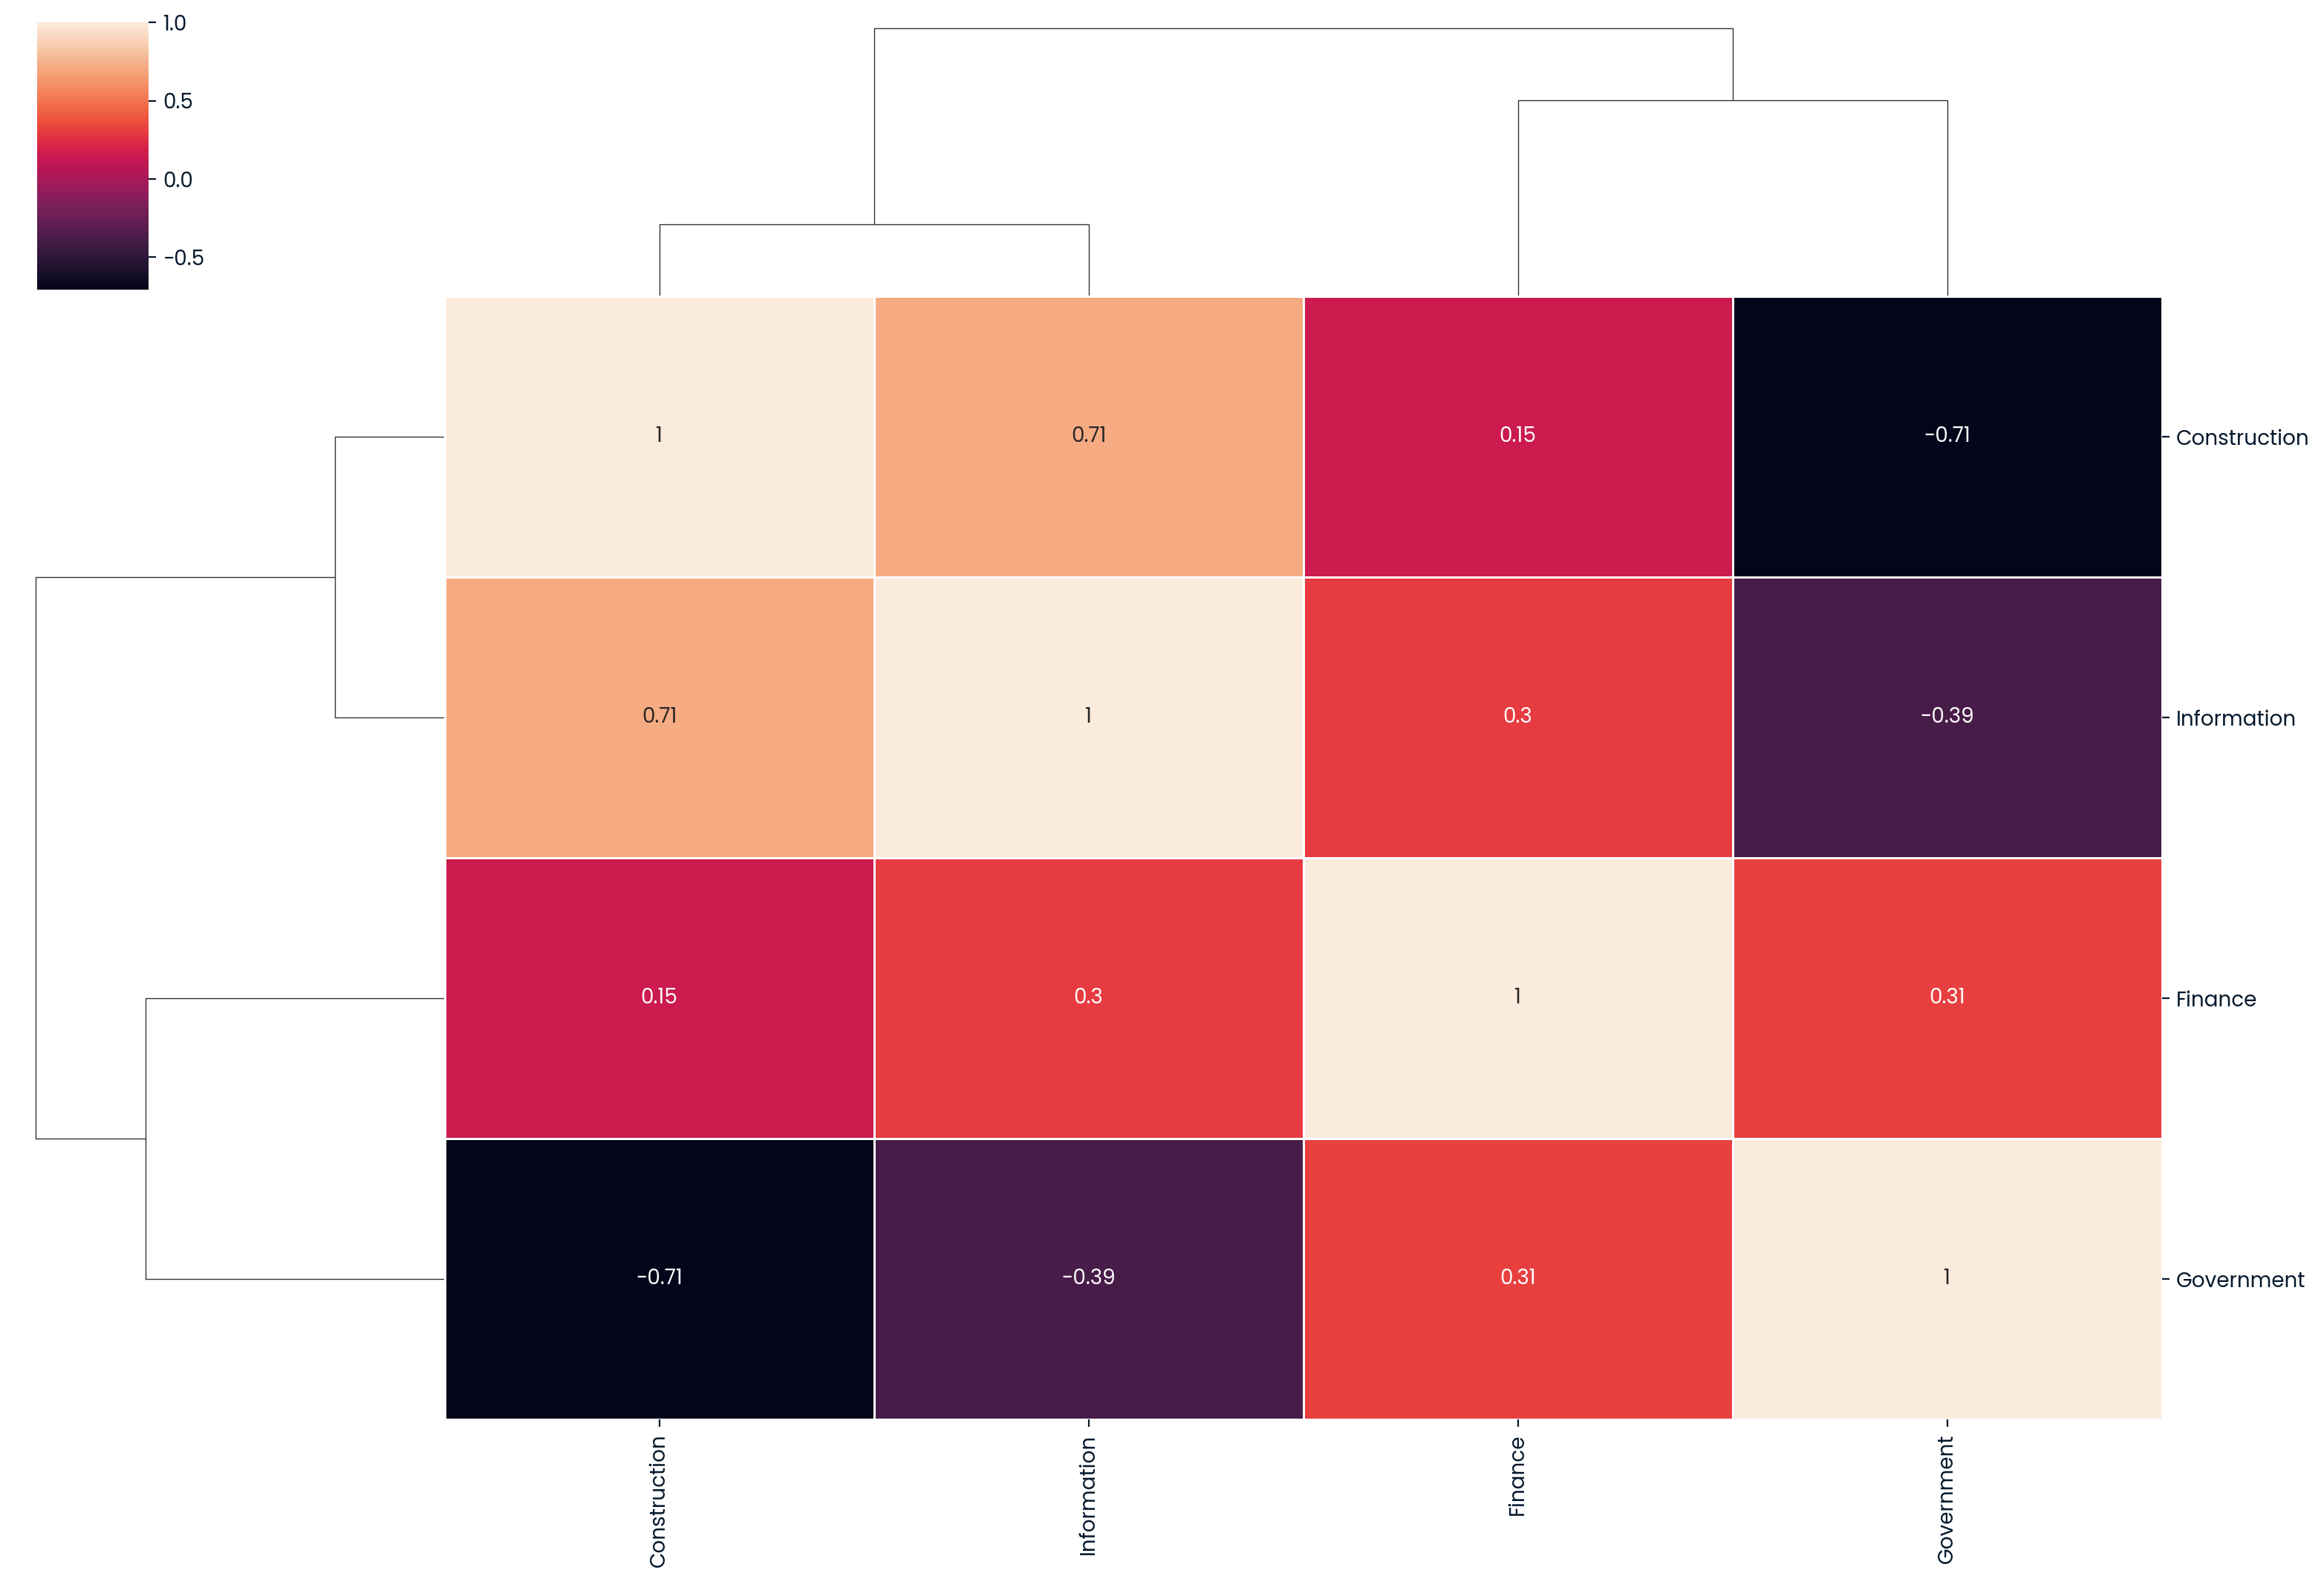

In [67]:
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 10}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()
